# Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessRegressor, GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import pgmpy.models as pgm
import pgmpy.estimators as pe
import pgmpy.inference as pinf

# Dataset Information

In [3]:
mat = pd.read_csv("D:/Master Course/Sem Two/Advanced Machine Learning/Dataset/student-mat.csv", delimiter=';')
por = pd.read_csv("D:/Master Course/Sem Two/Advanced Machine Learning/Dataset/student-por.csv", delimiter=';')

# Combine datasets if needed
data = pd.concat([mat, por]).drop_duplicates()

# View dataset information
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

In [4]:
data.shape

(1044, 33)

# Data Checks

## Check for missing values

In [5]:
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


## Check for duplicate values

In [6]:
print(data.duplicated().sum())

0


# Check Data Types

In [7]:
print(data.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


# Check Number of Unique Values

In [8]:
print(data.nunique())

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
dtype: int64


# Check Dataset Statistics

In [9]:
print(data.describe())

               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1

# Exploring Data

In [10]:
# Correlation heatmap to explore relationships between numerical variables
print("\nCorrelation with Final Grade (G3):")
# Select only numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
correlations = data[numeric_columns].corr()['G3'].sort_values(ascending=False)
print(correlations)


Correlation with Final Grade (G3):
G3            1.000000
G2            0.910743
G1            0.809142
Medu          0.201472
studytime     0.161629
Fedu          0.159796
famrel        0.054461
absences     -0.045671
freetime     -0.064890
health       -0.080079
goout        -0.097877
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64


# Exploring Data (Visualization)

C:\Users\Legion\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


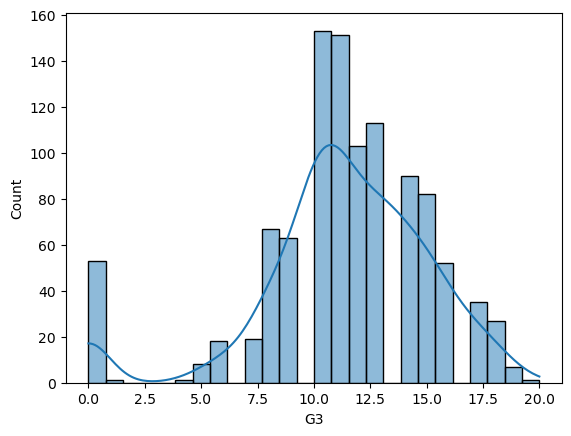

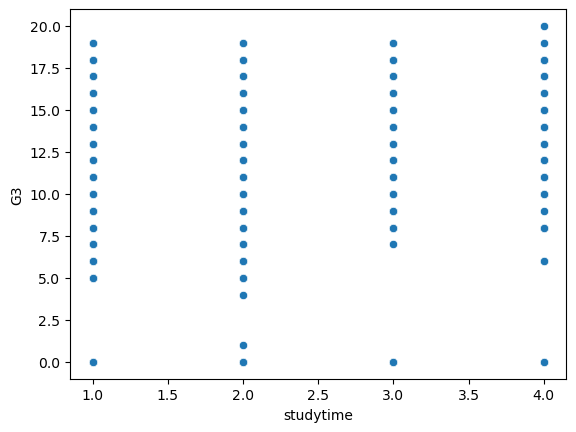

In [11]:
# Example: Plot the distribution of final grades (G3)
sns.histplot(data['G3'], kde=True)
plt.show()

# Example: Scatter plot of study time vs final grade
sns.scatterplot(x='studytime', y='G3', data=data)
plt.show()

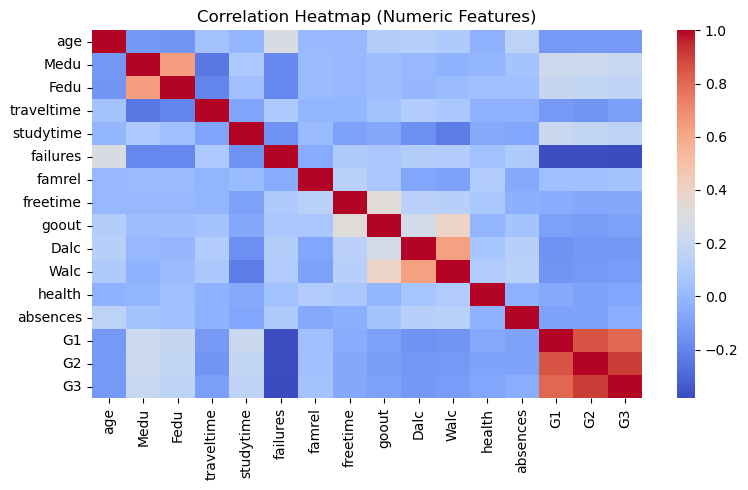

In [14]:
plt.figure(figsize=(8, 5))
sns.heatmap(data[numeric_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.tight_layout()
plt.show()

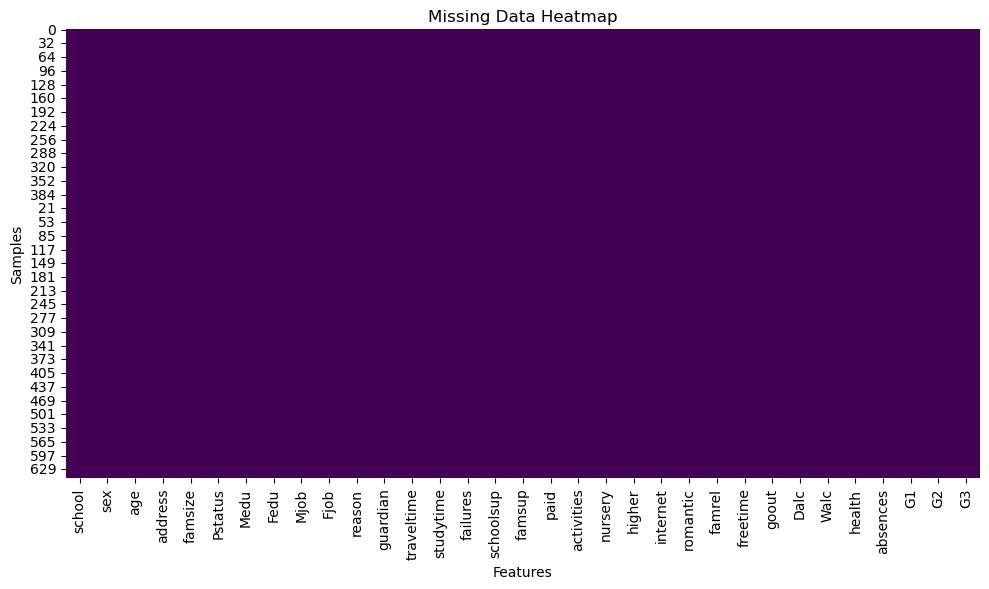

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Heatmap for merged dataset
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.tight_layout()
plt.show()

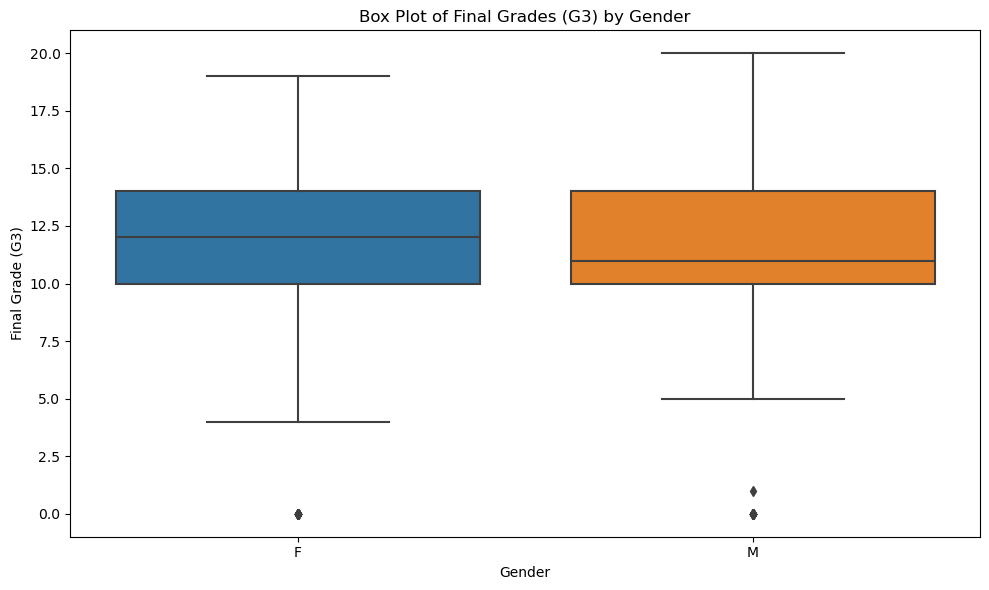

In [16]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for enhanced visualization

# Create a figure
plt.figure(figsize=(10, 6))  # Set the figure size

# Box plot for the merged dataset
sns.boxplot(x='sex', y='G3', data=data)  # Create box plot for final grades by gender
plt.title("Box Plot of Final Grades (G3) by Gender")  # Title for the box plot
plt.xlabel("Gender")  # X-axis label
plt.ylabel("Final Grade (G3)")  # Y-axis label

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

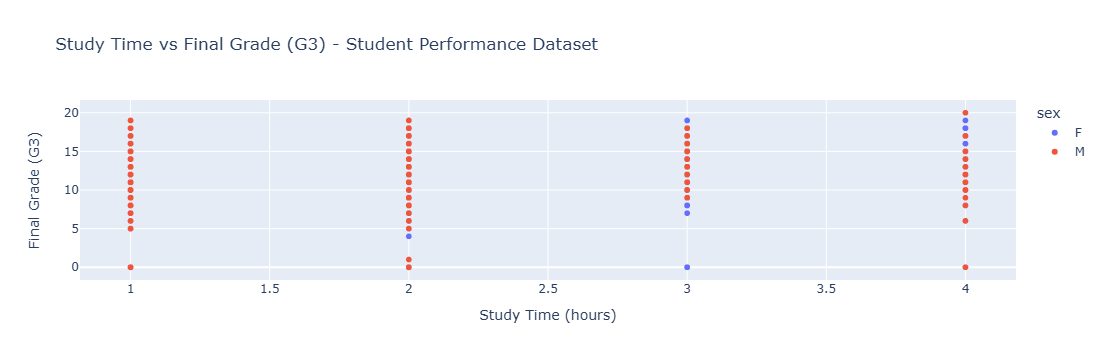

In [80]:
import plotly.express as px  # Importing Plotly Express for visualization

# Interactive scatter plot for mat dataset
fig_mat = px.scatter(data, x='studytime', y='G3', color='sex', 
                     title='Study Time vs Final Grade (G3) - Student Performance Dataset',
                     labels={'studytime': 'Study Time (hours)', 'G3': 'Final Grade (G3)'})
fig_mat.show()  # Display the scatter plot for mat dataset

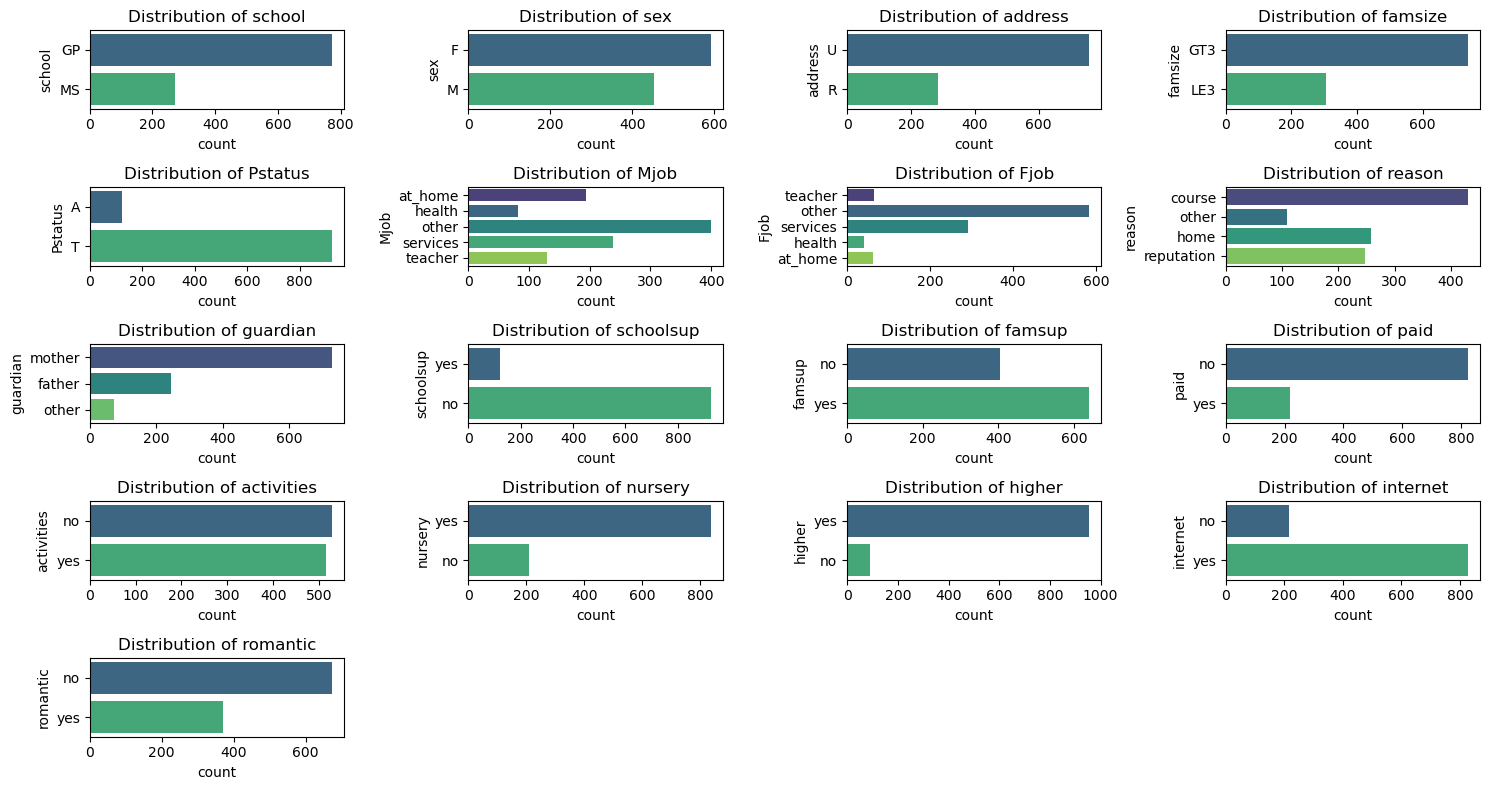

In [17]:
# Distribution of categorical variables
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 4, i+1)
    sns.countplot(y=data[col], palette='viridis')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

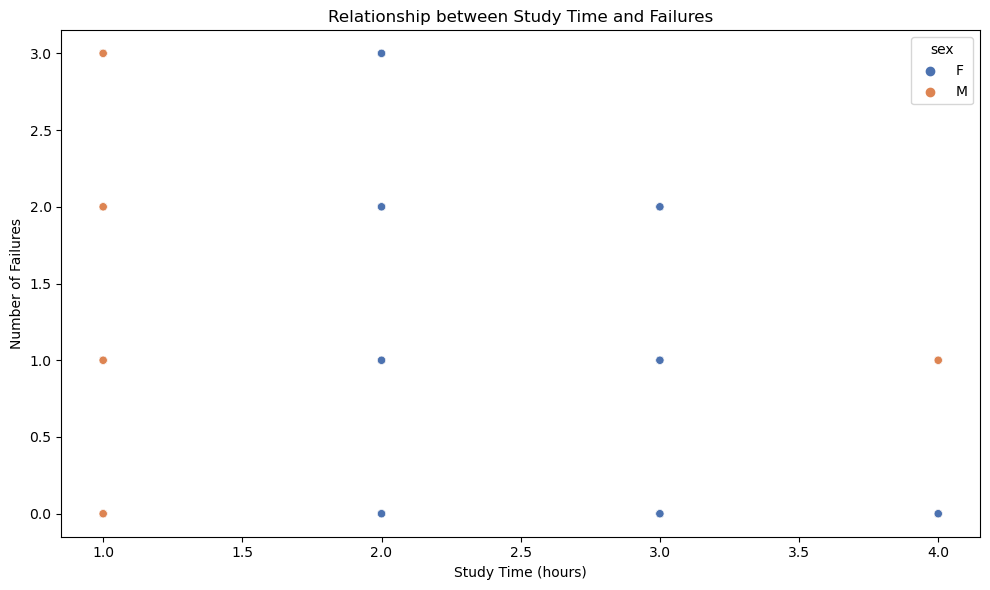

In [19]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for enhanced visualization

# Create a figure
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot for the merged dataset
sns.scatterplot(x='studytime', y='failures', data=data, hue='sex', palette='deep')  # Create scatter plot
plt.title('Relationship between Study Time and Failures')  # Title for the plot
plt.xlabel('Study Time (hours)')  # X-axis label
plt.ylabel('Number of Failures')  # Y-axis label

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

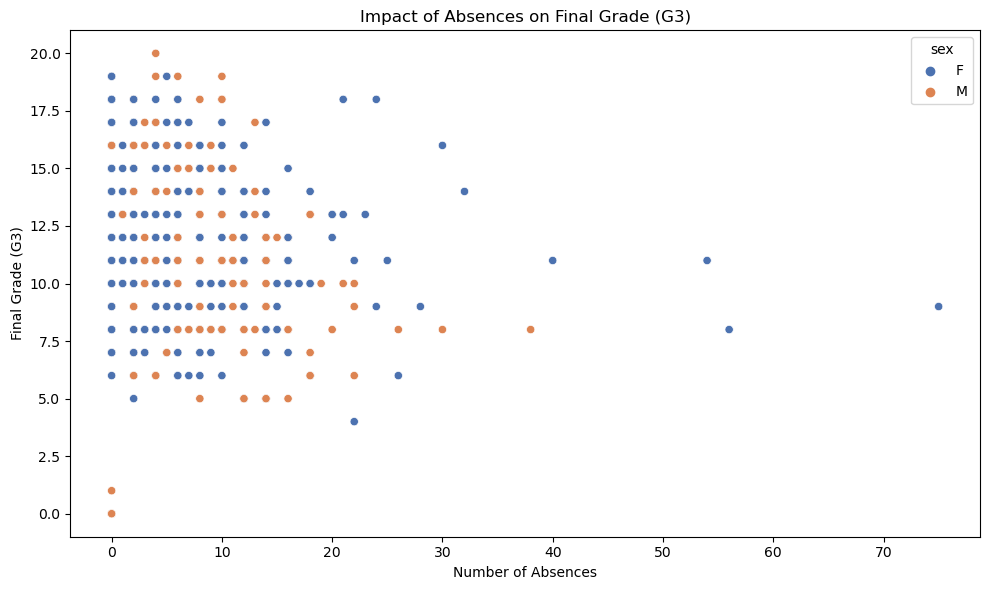

In [20]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for enhanced visualization

# Create a figure
plt.figure(figsize=(10, 6))  # Set the figure size

# Scatter plot for the merged dataset
sns.scatterplot(x='absences', y='G3', data=data, hue='sex', palette='deep')  # Create scatter plot
plt.title('Impact of Absences on Final Grade (G3)')  # Title for the plot
plt.xlabel('Number of Absences')  # X-axis label
plt.ylabel('Final Grade (G3)')  # Y-axis label

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

C:\Users\Legion\AppData\Local\Temp\ipykernel_16228\4288003750.py:9: FutureWarning: The provided callable <function mean at 0x000002B66049E700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table_data = data.pivot_table(values='G3', index='school', columns='sex', aggfunc=np.mean)


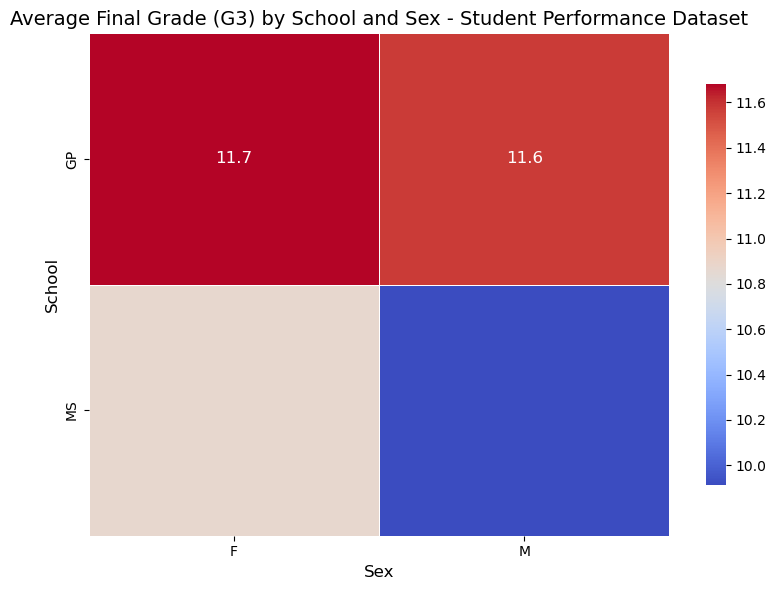

In [21]:
import numpy as np  # Importing NumPy for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import seaborn as sns  # Importing Seaborn for enhanced visualization

# Create subplots for the merged dataset
fig, axes = plt.subplots(1, 1, figsize=(8, 6))  # 1 row, 1 column

# Calculate the average final grade (G3) by school and sex for the merged dataset
pivot_table_data = data.pivot_table(values='G3', index='school', columns='sex', aggfunc=np.mean)

# Heatmap for merged dataset
sns.heatmap(pivot_table_data, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5, ax=axes, 
            cbar_kws={"shrink": 0.8}, annot_kws={"size": 12})  # Adjust font size for annotations
axes.set_title('Average Final Grade (G3) by School and Sex - Student Performance Dataset', fontsize=14)  # Title for heatmap
axes.set_xlabel('Sex', fontsize=12)  # X-axis label
axes.set_ylabel('School', fontsize=12)  # Y-axis label

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

C:\Users\Legion\AppData\Local\Temp\ipykernel_16228\2253096820.py:6: FutureWarning: The provided callable <function mean at 0x000002B66049E700> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  studytime_pivot_data = data.pivot_table(values='studytime', index='school', aggfunc=np.mean)


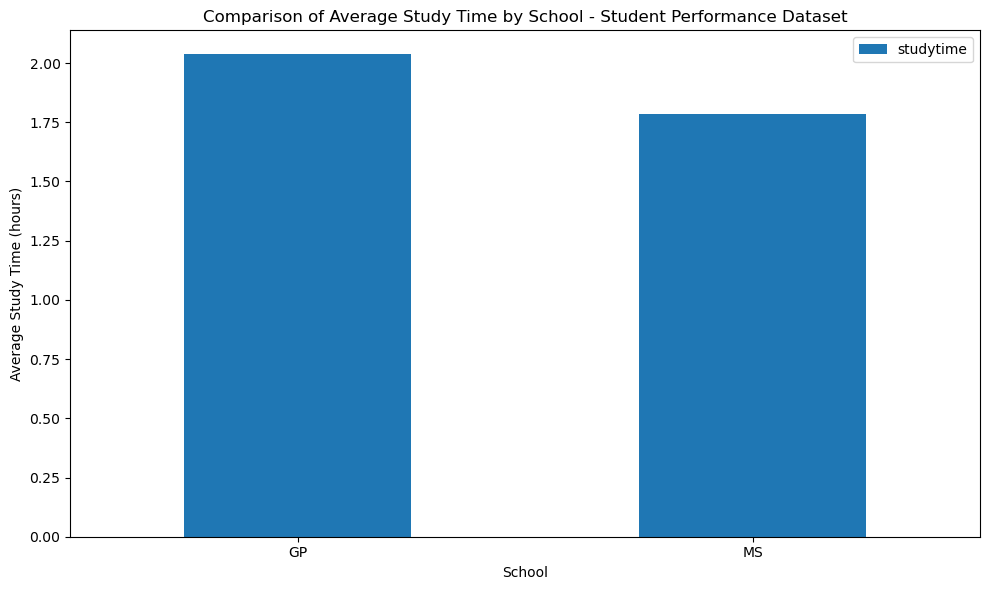

In [22]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting

# Calculate the average study time by school for the merged dataset
studytime_pivot_data = data.pivot_table(values='studytime', index='school', aggfunc=np.mean)

# Create a bar plot to compare average study time by school
studytime_pivot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Average Study Time by School - Student Performance Dataset')
plt.xlabel('School')
plt.ylabel('Average Study Time (hours)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

# Multivariate Analysis Using Pie Plot

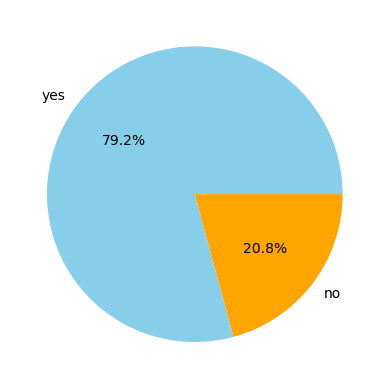

In [23]:
# Pie plot for categorical variables (e.g., internet access)
data['internet'].value_counts().plot.pie(autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.ylabel('')
plt.show()

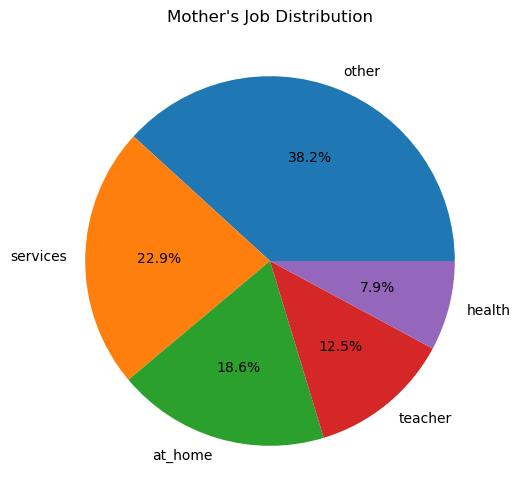

In [24]:
plt.figure(figsize=(10, 6))
data['Mjob'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Mother's Job Distribution")
plt.ylabel('')
plt.show()

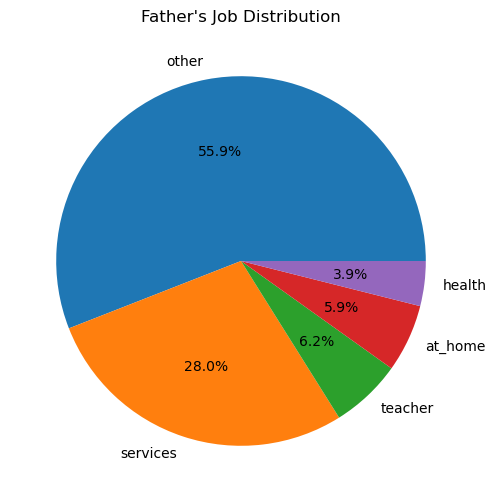

In [25]:
plt.figure(figsize=(10, 6))
data['Fjob'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Father's Job Distribution")
plt.ylabel('')
plt.show()

# Model Training

In [26]:
## Splitting the Dataset into Features (X) and Target (y)
X = data.drop(columns=['G3'])
y = data['G3']  # For regression, target is G3

# For classification, transform G3 into pass/fail (e.g., G3 >= 10 is pass)
y_class = np.where(data['G3'] >= 10, 1, 0)  # Pass/Fail

# Create Column Transformer

In [27]:
# Separate numerical and categorical columns
numeric_features = ['age', 'studytime', 'absences', 'G1', 'G2']
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']

# Preprocessing for numeric data and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Train-Test Split

In [28]:
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.3, random_state=42)

# Model Implementation: Gaussian Process Regression (GPR)

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
# Convert X_train and X_test to DataFrames if they're not already
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ]), categorical_features)
    ])

# Gaussian Process Regressor with RBF kernel
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-2, 1e2))
gpr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gpr', GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42))
])

# Fit model
gpr.fit(X_train, y_class_train)

# Predict and evaluate
y_pred = gpr.predict(X_test)
print("RMSE:", mean_squared_error(y_class_test, y_pred, squared=False))
print("R²:", r2_score(y_class_test, y_pred))

# Print first few predictions
print("\nFirst few predictions:")
print(y_pred[:10])

# Print first few actual values
print("\nFirst few actual values:")
print(y_class_test[:10])

# Print shape of predictions and actual values
print("\nShape of predictions:", y_pred.shape)
print("Shape of actual values:", y_class_test.shape)

C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


RMSE: 0.3283859605265105
R²: 0.42729166264280527

First few predictions:
[0.58511266 0.04386187 0.85393177 0.81433333 1.18351209 0.92699452
 0.56846095 0.8492872  1.16692513 1.1362827 ]

First few actual values:
[1 0 1 1 1 1 0 1 1 1]

Shape of predictions: (314,)
Shape of actual values: (314,)


# Gaussian Process Classification (GPC)

In [49]:
gpc = Pipeline(steps=[('preprocessor', preprocessor), ('gpc', GaussianProcessClassifier(kernel=1.0 * RBF(1.0)))])

# Fit the model
gpc.fit(X_train, y_class_train)

# Predict and evaluate
y_class_pred = gpc.predict(X_test)
print("Accuracy:", accuracy_score(y_class_test, y_class_pred))
print("Precision:", precision_score(y_class_test, y_class_pred))
print("Recall:", recall_score(y_class_test, y_class_pred))
print("F1-Score:", f1_score(y_class_test, y_class_pred))
print("AUC:", roc_auc_score(y_class_test, y_class_pred))

C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.7484076433121019
Precision: 0.7484076433121019
Recall: 1.0
F1-Score: 0.8561020036429872
AUC: 0.5


# Bayesian Network Construction

In [50]:
import pgmpy.models as pgm
import pgmpy.estimators as pe
import pgmpy.inference as pinf

# Create Bayesian model
model = pgm.BayesianNetwork()

# Define relationships based on domain knowledge
model.add_edges_from([
    ('studytime', 'G3'), 
    ('G1', 'G3'), 
    ('G2', 'G3'), 
    ('absences', 'G3'), 
    ('famsize', 'G3'), 
    ('Mjob', 'G3')
])

# Fit model using Maximum Likelihood Estimator
# Pass the class instead of an instance
model.fit(data, estimator=pe.MaximumLikelihoodEstimator)

# Perform inference to predict performance
inference = pinf.VariableElimination(model)

# Querying the model for G3 given certain evidence
query_result = inference.query(variables=['G3'], evidence={'studytime': 2, 'G1': 12})
print(query_result)

+--------+-----------+
| G3     |   phi(G3) |
+========+===========+
| G3(0)  |    0.0465 |
+--------+-----------+
| G3(1)  |    0.0465 |
+--------+-----------+
| G3(4)  |    0.0465 |
+--------+-----------+
| G3(5)  |    0.0465 |
+--------+-----------+
| G3(6)  |    0.0465 |
+--------+-----------+
| G3(7)  |    0.0465 |
+--------+-----------+
| G3(8)  |    0.0465 |
+--------+-----------+
| G3(9)  |    0.0465 |
+--------+-----------+
| G3(10) |    0.0467 |
+--------+-----------+
| G3(11) |    0.0709 |
+--------+-----------+
| G3(12) |    0.0866 |
+--------+-----------+
| G3(13) |    0.0775 |
+--------+-----------+
| G3(14) |    0.0600 |
+--------+-----------+
| G3(15) |    0.0523 |
+--------+-----------+
| G3(16) |    0.0474 |
+--------+-----------+
| G3(17) |    0.0465 |
+--------+-----------+
| G3(18) |    0.0465 |
+--------+-----------+
| G3(19) |    0.0465 |
+--------+-----------+
| G3(20) |    0.0465 |
+--------+-----------+


# Evaluation Function

In [51]:
def evaluate_model(y_test, y_pred):
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("R²:", r2_score(y_test, y_pred))

# Hyperparameter Tuning

In [53]:
# Hyperparameter tuning can be done using GridSearchCV for GPR/GPC models if required
from sklearn.model_selection import GridSearchCV

# Example for GPR
param_grid = {'gpr__alpha': [1e-2, 1e-3, 1e-4], 'gpr__kernel': [1.0 * RBF(1.0), C(1.0) * RBF(1.0)]}
grid_search = GridSearchCV(gpr, param_grid, cv=3)
grid_search.fit(X_train, y_class_train)

C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                                        ('cat',...
                                                                         Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                                       ('gpr',
                                        GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                                                                 n_restarts_optimizer=10,
                                                                 random_state=42))]),
             param_grid={'gpr__alpha': [0.01, 0.001, 0.0001],
                         'gpr__kernel': [1**2 * RBF(length_scale=1),
                                         1**2 * RBF(length_scale=1)]})

# Model Selection

## Regression Model Evaluation (Gaussian Process Regression)

In [55]:
# Predictions from the GPR model
y_pred_gpr = gpr.predict(X_test)

# Evaluate GPR model
rmse_gpr = mean_squared_error(y_class_test, y_pred_gpr, squared=False)
r2_gpr = r2_score(y_class_test, y_pred_gpr)

print(f"GPR Model - RMSE: {rmse_gpr}")
print(f"GPR Model - R²: {r2_gpr}")

GPR Model - RMSE: 0.3283859605265105
GPR Model - R²: 0.42729166264280527


## Classification Model Evaluation (Gaussian Process Classification)

In [56]:
# Predictions from the GPC model
y_class_pred_gpc = gpc.predict(X_test)

# Evaluate GPC model
accuracy_gpc = accuracy_score(y_class_test, y_class_pred_gpc)
precision_gpc = precision_score(y_class_test, y_class_pred_gpc)
recall_gpc = recall_score(y_class_test, y_class_pred_gpc)
f1_gpc = f1_score(y_class_test, y_class_pred_gpc)
auc_gpc = roc_auc_score(y_class_test, y_class_pred_gpc)

print(f"GPC Model - Accuracy: {accuracy_gpc}")
print(f"GPC Model - Precision: {precision_gpc}")
print(f"GPC Model - Recall: {recall_gpc}")
print(f"GPC Model - F1-Score: {f1_gpc}")
print(f"GPC Model - AUC: {auc_gpc}")

GPC Model - Accuracy: 0.7484076433121019
GPC Model - Precision: 0.7484076433121019
GPC Model - Recall: 1.0
GPC Model - F1-Score: 0.8561020036429872
GPC Model - AUC: 0.5


# Model Performance Comparision

In [59]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions from the GPR model
y_pred_gpr = gpr.predict(X_test)

# Evaluate GPR model
rmse_gpr = mean_squared_error(y_class_test, y_pred_gpr, squared=False)
r2_gpr = r2_score(y_class_test, y_pred_gpr)

# Predictions from the GPC model
y_class_pred_gpc = gpc.predict(X_test)

# Evaluate GPC model
accuracy_gpc = accuracy_score(y_class_test, y_class_pred_gpc)
precision_gpc = precision_score(y_class_test, y_class_pred_gpc, average='binary')  # Ensure binary handling
recall_gpc = recall_score(y_class_test, y_class_pred_gpc, average='binary')
f1_gpc = f1_score(y_class_test, y_class_pred_gpc, average='binary')
auc_gpc = roc_auc_score(y_class_test, gpc.predict_proba(X_test)[:, 1])  # Use probabilities for class 1

# Create a DataFrame to compare results
results = pd.DataFrame({
    'Model': ['Gaussian Process Regression', 'Gaussian Process Classification'],
    'RMSE': [rmse_gpr, 'N/A'],  # RMSE only for GPR
    'R²': [r2_gpr, 'N/A'],      # R² only for GPR
    'Accuracy': ['N/A', accuracy_gpc],
    'Precision': ['N/A', precision_gpc],
    'Recall': ['N/A', recall_gpc],
    'F1-Score': ['N/A', f1_gpc],
    'AUC': ['N/A', auc_gpc]
})

# Print the formatted results table
print("Model Performance Comparison")
print(results.to_string(index=False))

Model Performance Comparison
                          Model      RMSE        R²  Accuracy Precision Recall  F1-Score       AUC
    Gaussian Process Regression  0.328386  0.427292       N/A       N/A    N/A       N/A       N/A
Gaussian Process Classification       N/A       N/A  0.748408  0.748408    1.0  0.856102  0.917479


# Additional Comparison

## Evaluate Additional Regression Models

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Create pipelines for both models
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

lr_pipeline.fit(X_train, y_class_train)
y_pred_lr = lr_pipeline.predict(X_test)
rmse_lr = mean_squared_error(y_class_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_class_test, y_pred_lr)

# Fit and evaluate Random Forest
rf_pipeline.fit(X_train, y_class_train)
y_pred_rf = rf_pipeline.predict(X_test)
rmse_rf = mean_squared_error(y_class_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_class_test, y_pred_rf)

print(f"Linear Regression - RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")
print(f"Random Forest Regression - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Linear Regression - RMSE: 0.3368, R²: 0.3976
Random Forest Regression - RMSE: 0.2670, R²: 0.6215


# Visualize actual vs predicted values for both models

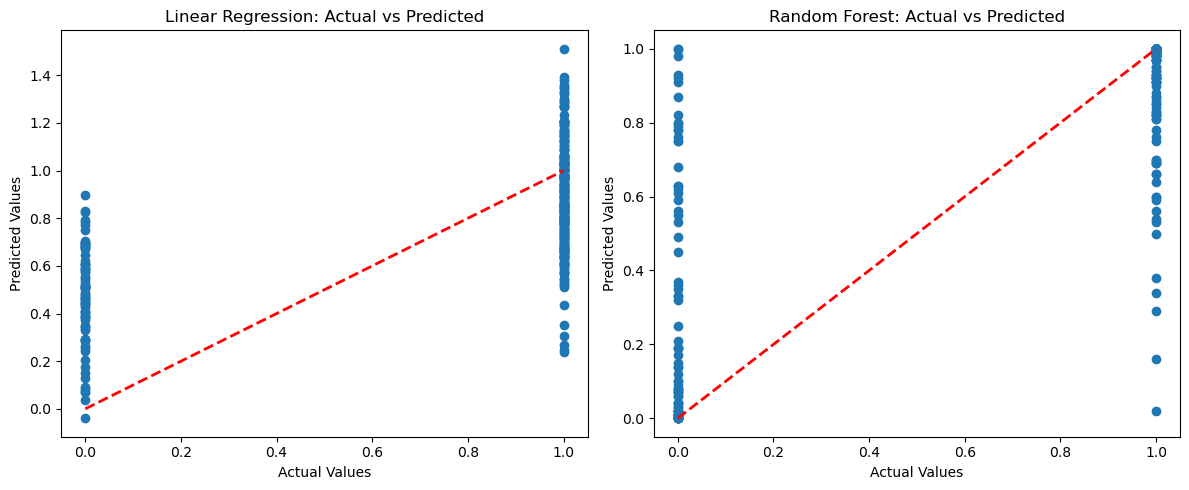

In [64]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_class_test, y_pred_lr)
plt.plot([y_class_test.min(), y_class_test.max()], [y_class_test.min(), y_class_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_class_test, y_pred_rf)
plt.plot([y_class_test.min(), y_class_test.max()], [y_class_test.min(), y_class_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Feature importance for Regression Model

In [71]:
print(type(numeric_features))  # This should show <class 'list'>

<class 'pandas.core.indexes.base.Index'>


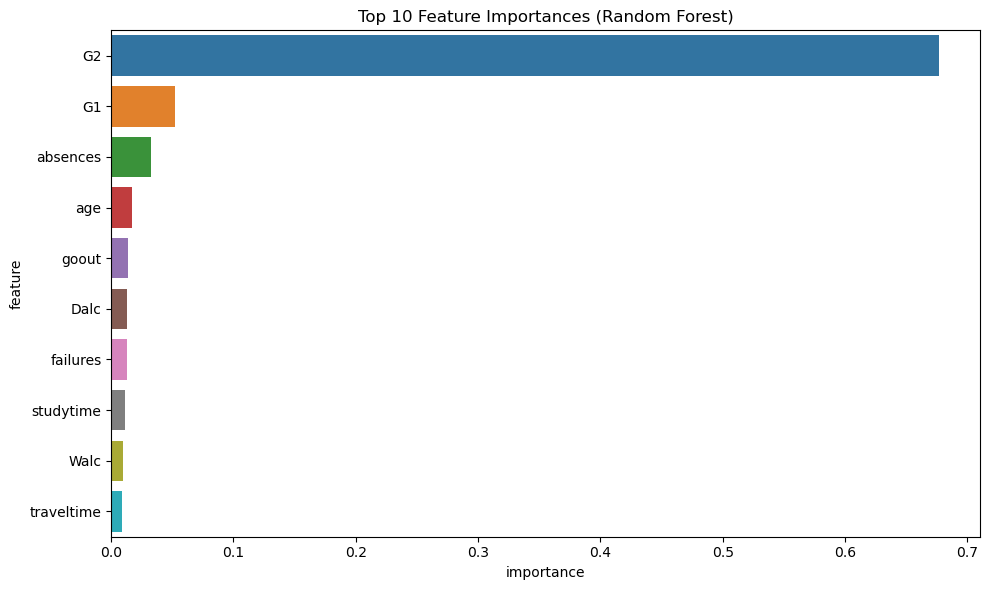

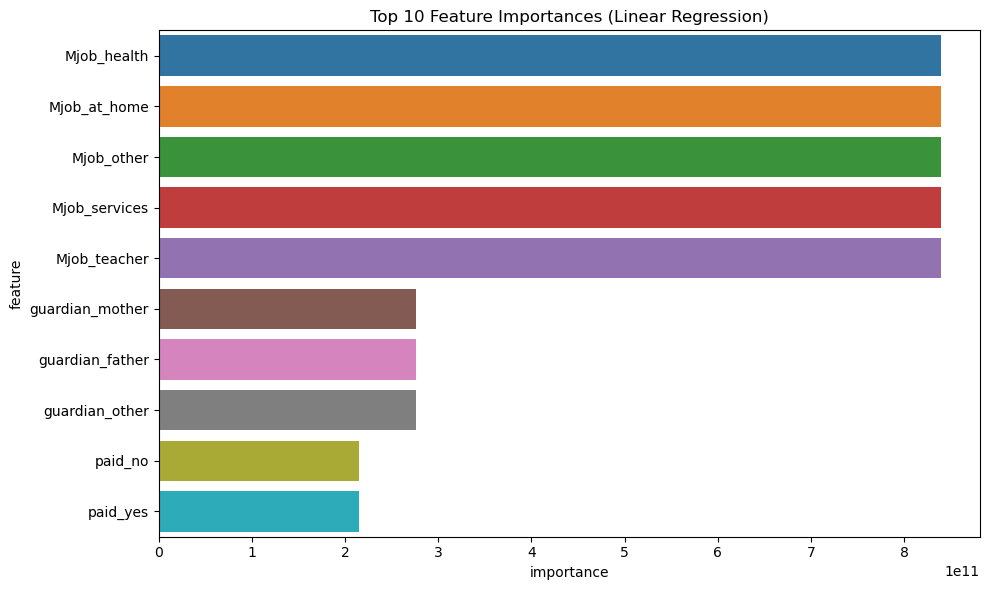

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot feature importances
def plot_feature_importance(importances, feature_names, title):
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance_df)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Function to get feature names
def get_feature_names(pipeline):
    numeric_features = pipeline.named_steps['preprocessor'].transformers_[0][2]
    categorical_features = pipeline.named_steps['preprocessor'].transformers_[1][2]
    onehot_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat']
    cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features).tolist()
    return numeric_features.tolist() + cat_feature_names

# Get feature names from the Random Forest pipeline
feature_names = get_feature_names(rf_pipeline)

# Random Forest Feature Importance
rf_importances = rf_pipeline.named_steps['regressor'].feature_importances_
plot_feature_importance(rf_importances, feature_names, 'Top 10 Feature Importances (Random Forest)')

# Linear Regression Feature Importance
# For Linear Regression, we use the absolute values of coefficients as importance
lr_importances = np.abs(lr_pipeline.named_steps['regressor'].coef_)
plot_feature_importance(lr_importances, feature_names, 'Top 10 Feature Importances (Linear Regression)')


In [75]:
# Compare the top 5 features from both models
rf_top_features = pd.DataFrame({'feature': feature_names, 'importance': rf_importances}).sort_values('importance', ascending=False).head()
lr_top_features = pd.DataFrame({'feature': feature_names, 'importance': lr_importances}).sort_values('importance', ascending=False).head()

print("Top 5 features (Random Forest):")
print(rf_top_features)
print("\nTop 5 features (Linear Regression):")
print(lr_top_features)

Top 5 features (Random Forest):
     feature  importance
14        G2    0.676536
13        G1    0.052485
12  absences    0.032300
0        age    0.017153
8      goout    0.013886

Top 5 features (Linear Regression):
          feature    importance
26    Mjob_health  8.395091e+11
25   Mjob_at_home  8.395091e+11
27     Mjob_other  8.395091e+11
28  Mjob_services  8.395091e+11
29   Mjob_teacher  8.395091e+11


# Evaluate Additional Classification Models

In [77]:
from sklearn.svm import SVC  # Import SVC for Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score# Create pipelines for both models
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

rf_clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit and evaluate SVM
svm_pipeline.fit(X_train, y_class_train)
y_class_pred_svm = svm_pipeline.predict(X_test)
y_class_pred_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]

# Fit and evaluate Random Forest Classifier
rf_clf_pipeline.fit(X_train, y_class_train)
y_class_pred_rf_clf = rf_clf_pipeline.predict(X_test)
y_class_pred_proba_rf_clf = rf_clf_pipeline.predict_proba(X_test)[:, 1]

# Function to calculate and print metrics
def print_metrics(y_true, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
          f"Recall: {recall:.4f}, F1-Score: {f1:.4f}, AUC: {auc:.4f}")

# Print metrics for both models
print_metrics(y_class_test, y_class_pred_svm, y_class_pred_proba_svm, "SVM")
print_metrics(y_class_test, y_class_pred_rf_clf, y_class_pred_proba_rf_clf, "Random Forest Classifier")

C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SVM - Accuracy: 0.8694, Precision: 0.8760, Recall: 0.9617, F1-Score: 0.9168, AUC: 0.9462
Random Forest Classifier - Accuracy: 0.8949, Precision: 0.8915, Recall: 0.9787, F1-Score: 0.9331, AUC: 0.9531


# Visualize ROC curves

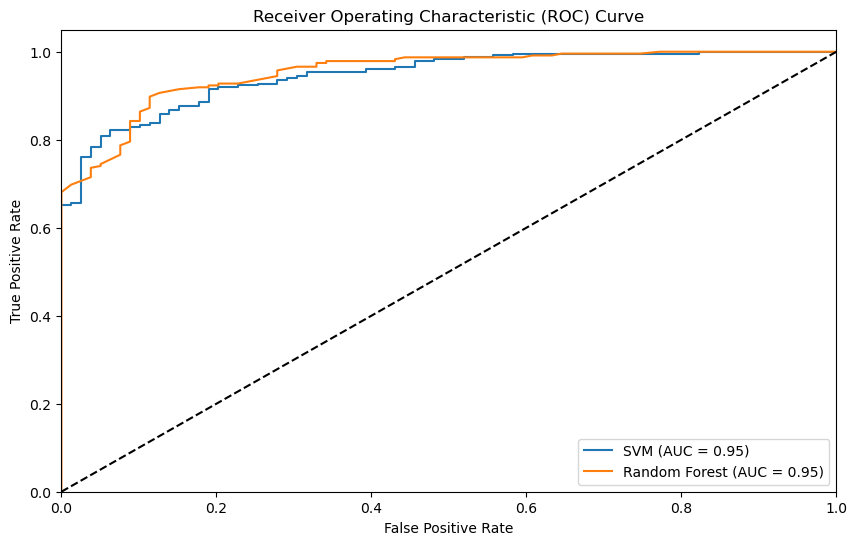

In [78]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for model, y_pred_proba in zip(['SVM', 'Random Forest'], 
                               [y_class_pred_proba_svm, y_class_pred_proba_rf_clf]):
    fpr, tpr, _ = roc_curve(y_class_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc_score(y_class_test, y_pred_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Compile All Results into a Comparison Table

In [81]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Create pipelines for all models
gpr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GaussianProcessRegressor(kernel=C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)), random_state=42))
])

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

rf_reg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

gpc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=42))
])

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

rf_clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit and predict for all models
# Regression models
gpr_pipeline.fit(X_train, y_class_train)
y_pred_gpr = gpr_pipeline.predict(X_test)

lr_pipeline.fit(X_train, y_class_train)
y_pred_lr = lr_pipeline.predict(X_test)

rf_reg_pipeline.fit(X_train, y_class_train)
y_pred_rf = rf_reg_pipeline.predict(X_test)

# Classification models
gpc_pipeline.fit(X_train, y_class_train)
y_pred_gpc = gpc_pipeline.predict(X_test)
y_pred_proba_gpc = gpc_pipeline.predict_proba(X_test)

svm_pipeline.fit(X_train, y_class_train)
y_class_pred_svm = svm_pipeline.predict(X_test)
y_class_pred_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]

rf_clf_pipeline.fit(X_train, y_class_train)
y_class_pred_rf_clf = rf_clf_pipeline.predict(X_test)
y_class_pred_proba_rf_clf = rf_clf_pipeline.predict_proba(X_test)[:, 1]

# Function to calculate regression metrics
def get_regression_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return pd.Series({'RMSE': rmse, 'R2': r2})

# Function to calculate classification metrics
def get_classification_metrics(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)
    return pd.Series({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'AUC': auc})

# Create DataFrames for regression and classification results
regression_results = pd.DataFrame({
    'GPR': get_regression_metrics(y_class_test, y_pred_gpr),
    'Linear Regression': get_regression_metrics(y_class_test, y_pred_lr),
    'Random Forest Regression': get_regression_metrics(y_class_test, y_pred_rf)
})

classification_results = pd.DataFrame({
    'GPC': get_classification_metrics(y_class_test, y_pred_gpc, y_pred_proba_gpc[:, 1]),
    'SVM': get_classification_metrics(y_class_test, y_class_pred_svm, y_class_pred_proba_svm),
    'Random Forest Classification': get_classification_metrics(y_class_test, y_class_pred_rf_clf, y_class_pred_proba_rf_clf)
})

# Combine the results
all_results = pd.concat([regression_results, classification_results], keys=['Regression', 'Classification'])

# Display the results
print("All Model Results:")
print(all_results.round(4))

# Optionally, save the results to a CSV file
all_results.round(4).to_csv('model_results.csv')

C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Legion\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

All Model Results:
                             GPR  Linear Regression  Random Forest Regression  \
Regression     RMSE       0.8633             0.3368                    0.2670   
               R2        -2.9578             0.3976                    0.6215   
Classification Accuracy      NaN                NaN                       NaN   
               Precision     NaN                NaN                       NaN   
               Recall        NaN                NaN                       NaN   
               F1            NaN                NaN                       NaN   
               AUC           NaN                NaN                       NaN   

                             GPC     SVM  Random Forest Classification  
Regression     RMSE          NaN     NaN                           NaN  
               R2            NaN     NaN                           NaN  
Classification Accuracy   0.7484  0.8694                        0.8949  
               Precision  0.7484  0.8760

# Visualize the results

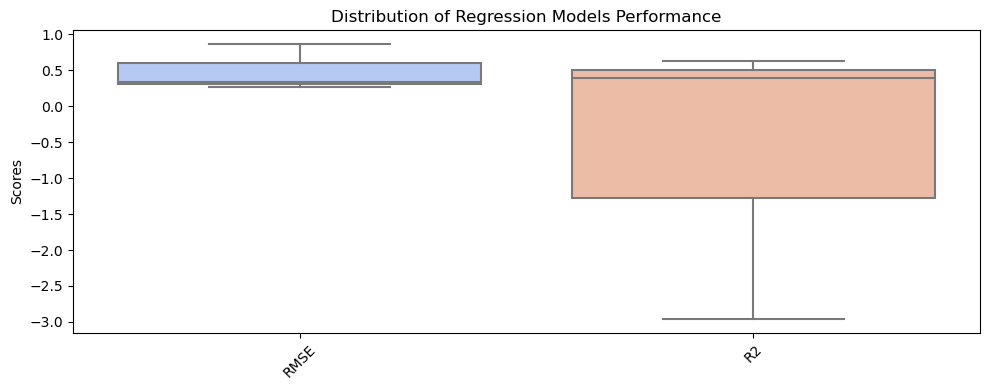

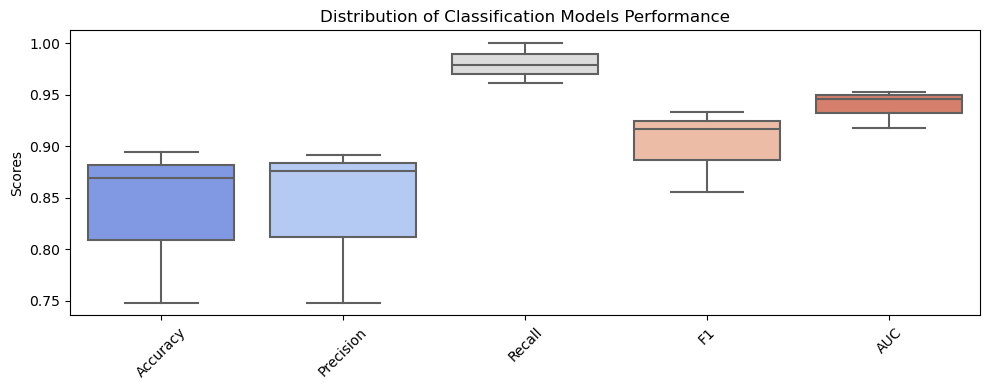

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `regression_results` is a DataFrame where the columns are the regression model names 
# and the index are the metrics (like RMSE, MAE, R²).

plt.figure(figsize=(10, 4))
sns.boxplot(data=regression_results.T, palette='coolwarm')
plt.title('Distribution of Regression Models Performance')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assuming `classification_results` is a DataFrame where the columns are the classification model names 
# and the index are the metrics (like Accuracy, Precision, Recall, etc.).

plt.figure(figsize=(10, 4))
sns.boxplot(data=classification_results.T, palette='coolwarm')
plt.title('Distribution of Classification Models Performance')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()